In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Get responder mapping

In [25]:
response=pd.read_csv("../data/M4_sample_mapping.csv")

In [26]:
mp_response=dict(zip(response["sample.id"],response["class"]))

In [27]:
response["class"].value_counts()

No-response    11
Responder       8
Stable          6
Name: class, dtype: int64

## Get RNA data

In [28]:
rna=pd.read_csv("../data/M4_rna.csv",skiprows=[0])

In [29]:
rna.head()
rna.shape

(2977, 26)

In [30]:
rna=rna.set_index("SYMBOL")

In [31]:
for x in rna.columns:
    rna[x]=rna[x]/rna[x].sum()

In [32]:
rna=rna*1000000

In [33]:
rna=rna.T

In [34]:
rna+=1
rna=np.log2(rna)

In [35]:
rna["group"]=rna.index.map(mp_response)

## boxplots for gene expression

In [36]:
mouse=pd.read_csv("../data/mart_export.txt",delimiter="\t")

In [37]:
mouse=mouse[~mouse["Gene name"].duplicated()]

In [43]:
rna

SYMBOL,Aanat,Abca1,Abcg1,Acadl,Acads,Aco2,Acp5,Actg2,Adam11,Adam12,...,Gm10639,Tigit,Zfp831,Ddx43,Gm17359,Gm17455,Hbb-bs,Micalcl,Gm11127,group
1_145_EPG,0.834726,7.631199,5.161926,9.697721,8.542089,10.611301,4.505534,3.028138,3.119304,9.201518,...,7.438023,1.335431,0.506911,0.319943,0.000000,0.000000,10.237925,0.660096,4.758609,No-response
4_166_EPG,0.743433,7.835279,5.268386,9.662456,8.434436,10.719564,5.190500,3.105605,3.364384,9.505929,...,7.723283,2.377051,0.760684,1.256145,1.571205,0.000000,12.532658,1.483951,4.677185,No-response
5_168_EPG,2.055976,7.875106,5.922757,9.505065,8.386718,10.681289,5.498156,2.769498,3.656329,9.533529,...,7.788321,2.971382,1.669873,1.051211,0.730942,0.000000,9.510558,0.486366,5.674678,No-response
3_152_EPG,1.723407,8.223600,6.003007,9.755959,8.505405,10.585063,5.764969,3.672692,3.109881,9.651651,...,7.105241,1.881996,1.288756,0.629593,1.927979,0.684715,12.196990,3.326973,4.468665,No-response
2_146_EPG,0.434052,8.218466,5.732733,9.223516,8.246006,10.632422,5.774681,4.168030,3.285737,9.247660,...,6.598648,3.490334,1.727056,0.875181,1.834455,1.078157,10.247169,1.986662,5.300199,No-response
6_138_EPG,1.459353,7.533319,5.502610,9.458517,8.427106,10.337543,5.264978,3.242257,2.941813,9.751641,...,6.533029,2.224869,1.240832,0.221998,1.016830,0.635989,10.636423,0.950796,5.038224,No-response
11_172_EPG,1.829283,8.535032,6.472045,9.451725,8.338352,10.456977,6.610230,3.269769,3.835519,9.536849,...,7.504895,3.691178,2.910263,0.978943,1.696155,0.000000,9.881591,2.138701,5.384854,No-response
10_162_EPG,2.984864,8.443826,6.973583,9.370195,8.170190,10.463691,7.340267,3.286988,4.108477,9.712206,...,5.973131,4.841271,3.286900,2.385941,1.289706,1.358463,9.309259,2.543235,6.758978,No-response
9_150_EPG,2.135921,9.149516,7.783633,8.866912,8.123177,10.051958,9.066670,2.028124,3.338898,8.092596,...,2.555079,4.630303,3.813038,1.935134,0.696495,3.179804,9.478030,1.326801,7.628633,No-response
7_139_EPG,1.968740,9.440760,8.089498,9.225496,8.305452,10.076825,8.660026,3.008463,4.254630,8.822391,...,3.077604,5.211001,3.749423,1.555466,3.116088,0.943100,11.137218,1.352616,6.761751,No-response


In [39]:
from scipy.stats import ttest_ind

In [40]:
cat1 = rna[rna["group"]=="Responder"]
cat2 = rna[rna["group"]=="No-response"]

Haus1
B2m
Slc25a40
Trex1
9530003J23Rik
Gm15448
Lair1
Ttest_indResult(statistic=4.9106065857038015, pvalue=0.00013217093351575325)
Psmd2
Ttest_indResult(statistic=5.139199162898392, pvalue=8.197651065326056e-05)
Ttest_indResult(statistic=6.291078378050262, pvalue=8.12637285394906e-06)
Ttest_indResult(statistic=4.964861860743424, pvalue=0.00011794569372251271)
Ttest_indResult(statistic=4.951694261926699, pvalue=0.00012124736067619624)


<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

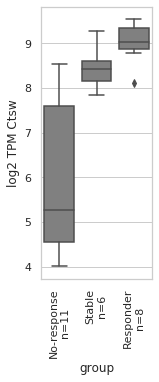

<Figure size 144x360 with 0 Axes>

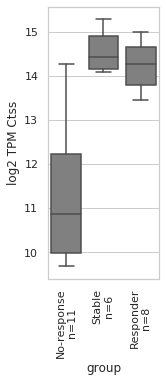

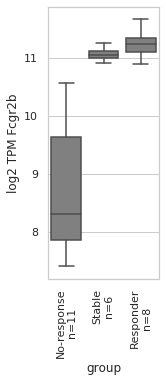

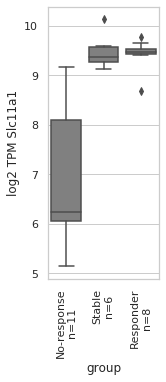

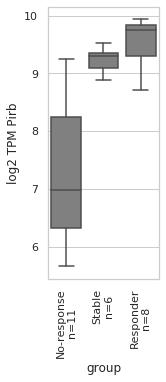

In [44]:
for x in mouse["Mouse gene name"].tolist()+["Pirb"]:
    try:
        sns.set(style="whitegrid", font_scale = 1)
        plt.figure(figsize=(2,5))
        ax=sns.boxplot(x="group", y=x,data=rna,color="gray")
        plt.ylabel("log2 TPM "+x)
        
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels=[x+"\nn="+str(len(rna[rna["group"]==x])) for x in labels]

        ax.set_xticklabels(labels)
        
        plt.xticks(rotation=90)
        plt.savefig("../plots/"+x+".pdf")
        print(ttest_ind(cat1[x], cat2[x]))
    except:
        print(x)
    

In [120]:
# for x in rna.columns.tolist()[0:100]:
#     try:
#         sns.set(style="whitegrid", font_scale = 1)
#         plt.figure(figsize=(5,5))
#         ax=sns.boxplot(x="group", y=x,data=rna,color="gray")
#         plt.ylabel("log2 TPM "+x)
#     except:
#         print(x)
    

In [46]:
df=pd.read_csv("../data/Exome summary- B2905 & tumors in aCTLA4 study (1).csv")

In [47]:
df=df.T
df=df.reset_index()

In [48]:
mp_df=dict(zip(df["index"],df[0]))

In [49]:
rna=pd.read_csv("../data/GSE144946_GEO_GlennRNAseq46_rpkm.txt",delimiter="\t")

In [50]:
rna=rna.set_index("SYMBOL")

In [51]:
cols=[x for x in rna.columns if x in [x for x in mp_df.keys()]]

In [52]:
rna_filt=rna[cols]
rna_filt=rna_filt.T

In [53]:
rna_filt["status"]=rna_filt.index.map(mp_df)

Gm15448


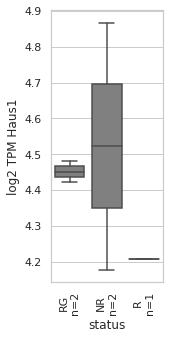

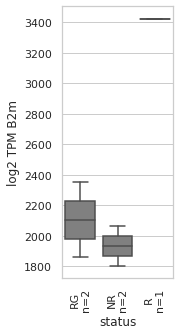

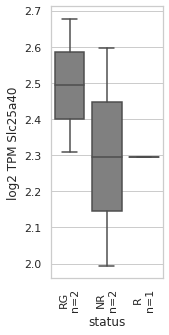

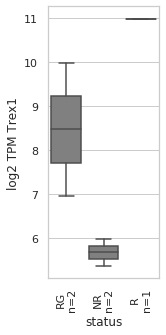

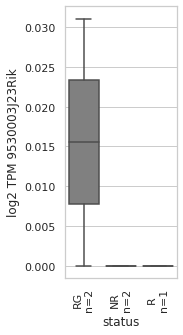

<Figure size 144x360 with 0 Axes>

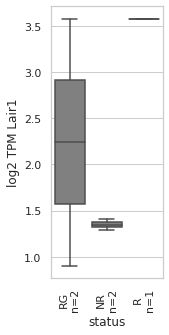

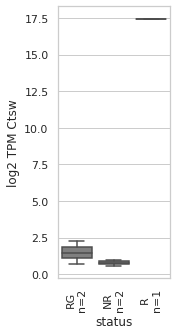

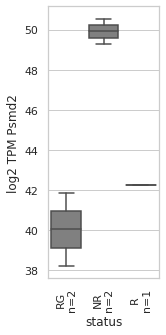

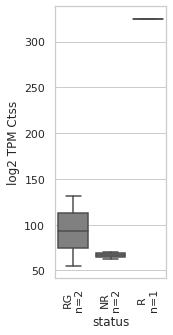

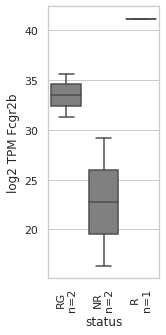

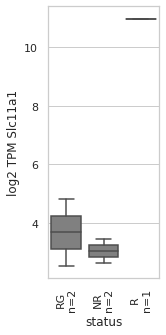

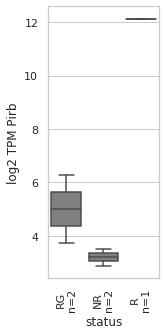

In [54]:
for x in mouse["Mouse gene name"].tolist()+["Pirb"]:
    try:
        sns.set(style="whitegrid", font_scale = 1)
        plt.figure(figsize=(2,5))
        ax=sns.boxplot(x="status", y=x,data=rna_filt,color="gray")
        plt.ylabel("log2 TPM "+x)
        plt.xticks(rotation=90)
        
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels=[x+"\nn="+str(len(rna_filt[rna_filt["status"]==x])) for x in labels]

        ax.set_xticklabels(labels)
        plt.savefig("../plots/"+x+".pdf")
    except:
        print(x)
    

In [131]:
rna_filt["status"].value_counts()

NR    2
RG    2
R     1
Name: status, dtype: int64

In [ ]:
r